In [1]:
import os;os.getcwd()

'/home/dp/gits/hms-handler'

In [2]:
from cn_correct import MultiCorrectionTool as MCT

In [3]:
import numpy as np

In [4]:
l1_list=np.linspace(1,9,10)**2
l1_list=list(1-l1_list/(max(l1_list)+1))
model_spec_list=[
    {'elastic-net':{
        'l1_ratio':l1_list,#list(1-np.logspace(-2,-.03,7)),
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'max_poly_deg':5,'fit_intercept':False}
        },
    {'lasso':{'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
              'max_poly_deg':5,'fit_intercept':False,
             'n_alphas':200
             }
        },
    {'lin-reg':{'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
                'max_poly_deg':5,'fit_intercept':False}},
    {'gbr':{
        'kwargs':{},
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'param_grid':{
            'ccp_alpha':[0.001,0.005,0.01],
            'n_estimators':[200],
            'learning_rate':[0.05,0.025],
            'subsample':[0.7],'max_depth':[3]}#these pass through to sklearn's gbr
            }
        },
    {'gbr':{
            'kwargs':{},
            'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
            'param_grid':{
                'n_estimators':[50,100,400],
                'learning_rate':[0.05,0.025],
                'subsample':[1,0.7],
                'max_depth':[2,3]}#these pass through to sklearn's gbr
                }
            },
    ]

        

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
mct=MCT(model_specs=model_spec_list)


In [7]:
mct.runCorrections() # not necessary if it's been run before and correction_results_df exists

In [8]:
mct.buildCorrectionResultsDF()

In [9]:
#mct.correction_results_df.groupby('section')['nse'].idxmax()

In [10]:
mct.selectCorrections()

In [11]:
mct.setCorrectionSelectionAccuracy()

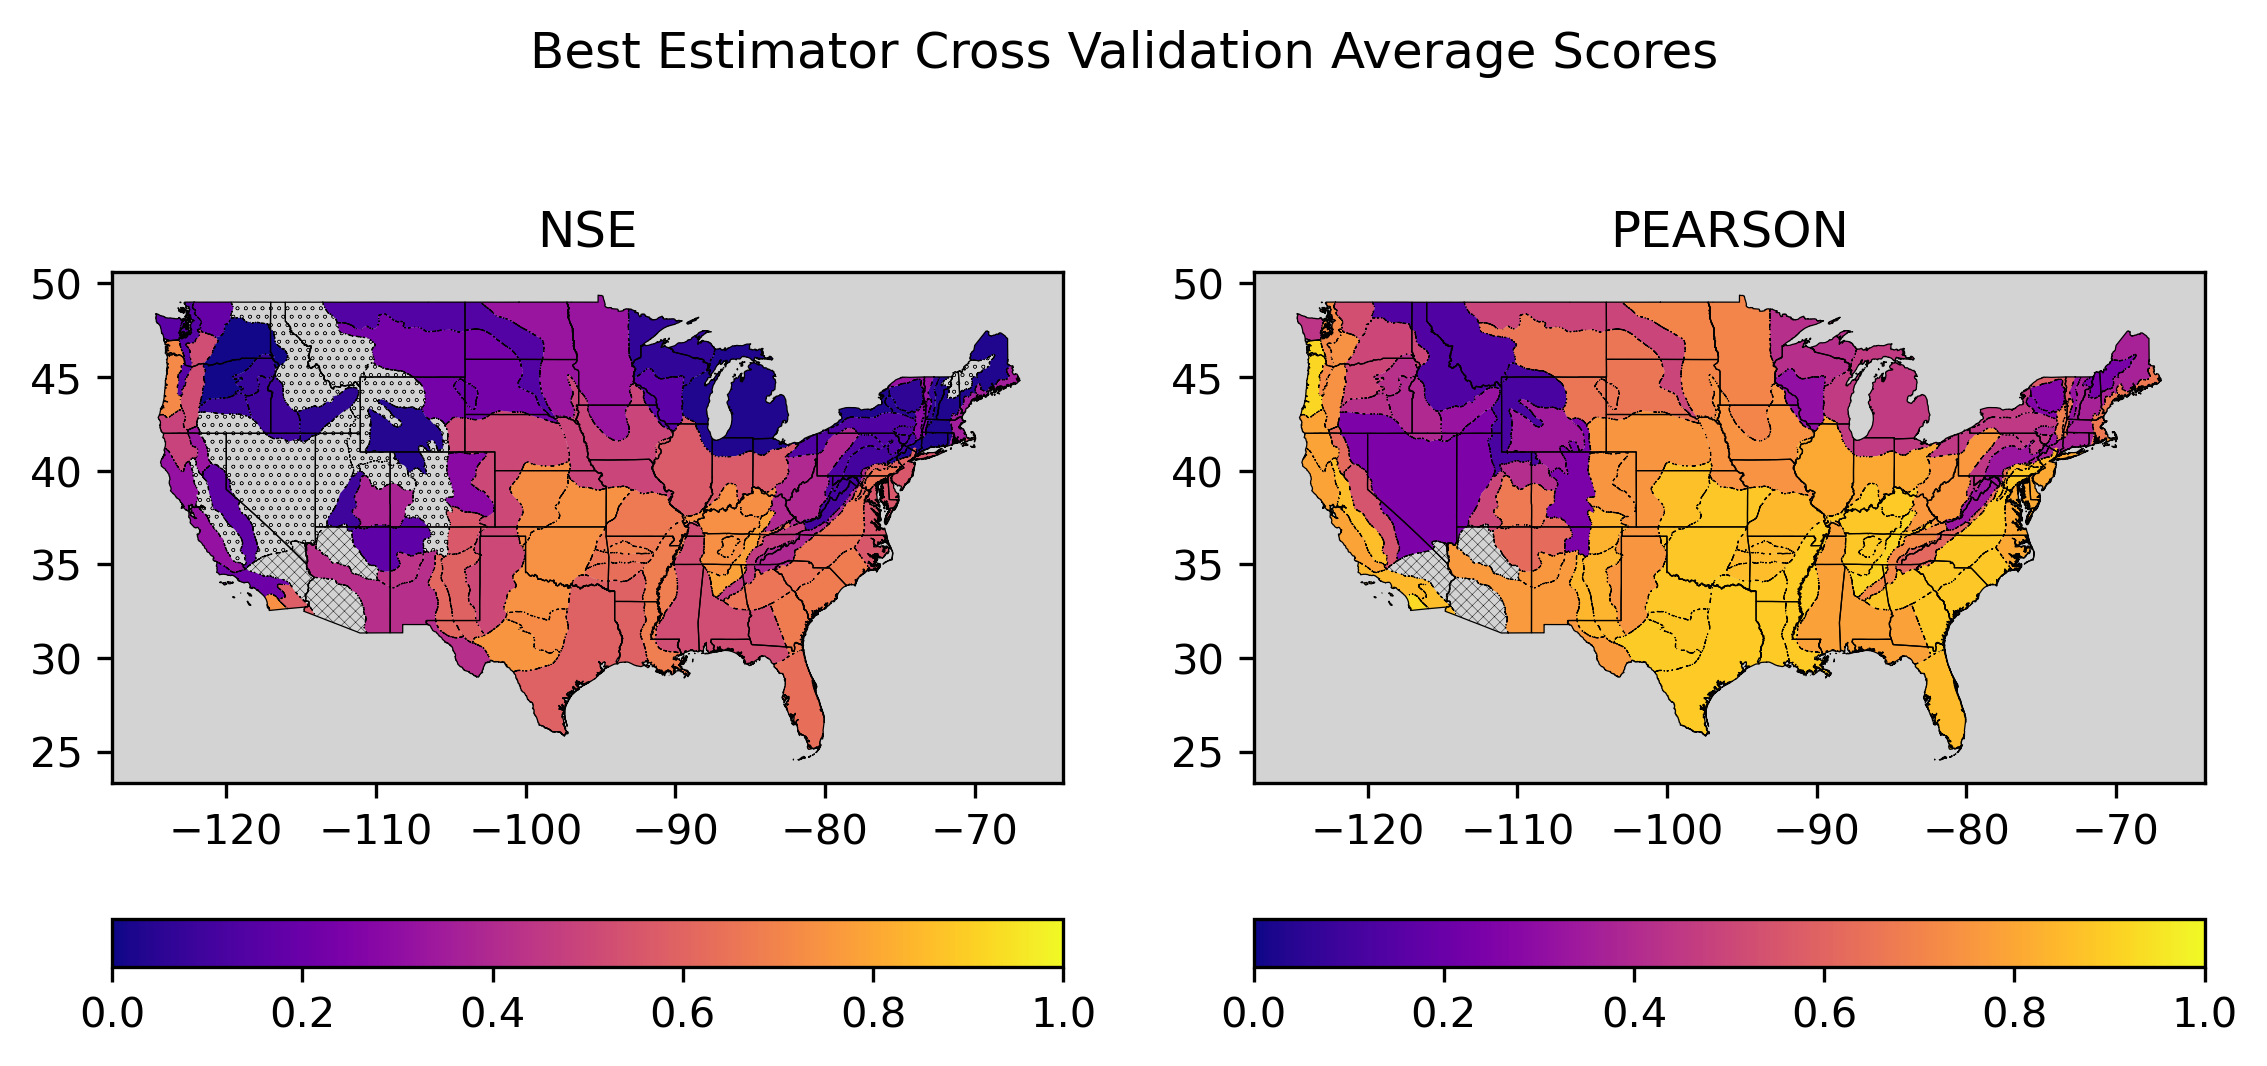

In [12]:
mct.plotGeogHybridAccuracy(plot_negative=False)

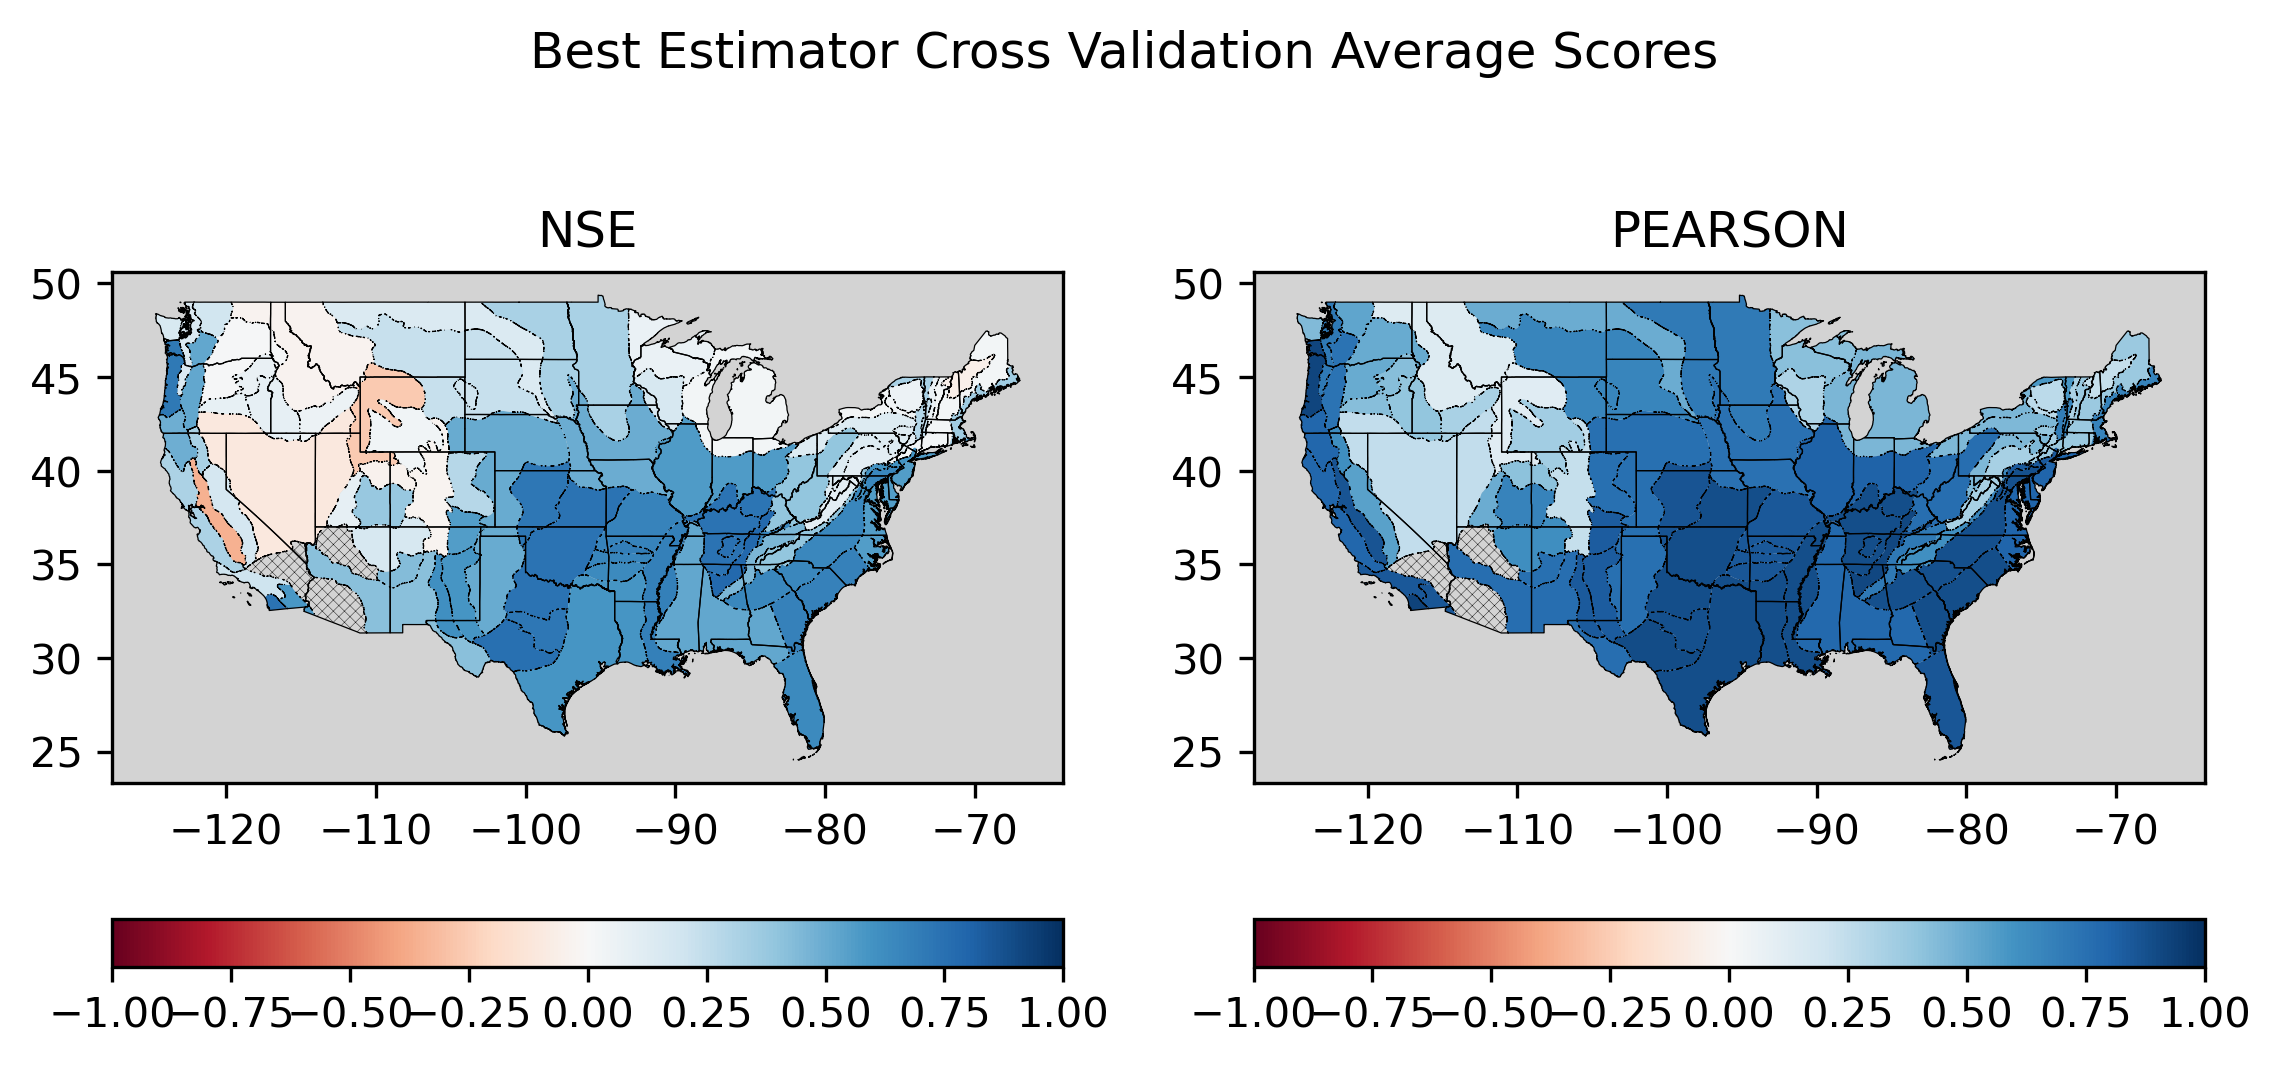

In [13]:
mct.plotGeogHybridAccuracy(plot_negative=True)

In [14]:
mct.geog_gdf.head(60)

,geometry,area,perimeter,physiodd_,physiodd_i,fcode,fencode,division,province,provcode,nse,pearson
section,,,,,,,,,,,,
ADIRONDACK,"POLYGON ((-75.69115 44.03500, -75.68451 44.093...",2.921,6.967,100,127,100,10,APPALACHIAN HIGHLANDS,ADIRONDACK,10,0.061297,0.265866
ALLEGHENY MOUNTAIN,"POLYGON ((-76.04985 41.28189, -76.06739 41.268...",2.999,11.795,162,204,84,8d,APPALACHIAN HIGHLANDS,APPALACHIAN PLATEAUS,8,0.139199,0.446696
ARKANSAS VALLEY,"POLYGON ((-94.91673 35.69059, -94.87203 35.681...",2.252,10.101,313,29,151,15a,INTERIOR HIGHLANDS,OUACHITA,15,0.660105,0.851043
BLACK HILLS,"POLYGON ((-104.53880 44.81485, -104.51708 44.8...",1.432,4.984,99,10,133,13c,INTERIOR PLAINS,GREAT PLAINS,13,0.206297,0.658565
BLUE MOUNTAIN,"POLYGON ((-116.67696 45.47911, -116.70153 45.4...",3.231,10.554,66,2,202,20b,INTERMONTANE PLATEAUS,COLUMBIA PLATEAU,20,0.077423,0.424011
"BOSTON ""MOUNTAINS""","POLYGON ((-91.48744 35.60836, -91.55844 35.608...",1.263,7.168,305,28,142,14b,INTERIOR HIGHLANDS,OZARK PLATEAUS,14,0.690329,0.849201
CALIFORNIA COAST RANGES,"MULTIPOLYGON (((-121.87582 38.03679, -121.7951...",3.997,13.212,191,170,246,24f,PACIFIC MOUNTAIN SYSTEM,PACIFIC BORDER,24,0.313320,0.789913
CALIFORNIA TROUGH,"POLYGON ((-121.92080 38.08158, -121.92080 38.0...",5.097,16.822,211,201,245,24e,PACIFIC MOUNTAIN SYSTEM,PACIFIC BORDER,24,-0.358806,0.860203
CANYON LANDS,"POLYGON ((-107.47361 38.93904, -107.48367 38.8...",7.696,12.814,231,18,213,21c,INTERMONTANE PLATEAUS,COLORADO PLATEAUS,21,0.382555,0.669648


In [15]:
mct.geog_model_select_dict

{'ADIRONDACK': {'nse': 0.06129736757887634, 'cc_idx': 3, 'estimator': 'gbr'},
 'ALLEGHENY MOUNTAIN': {'nse': 0.1391989670865876,
  'cc_idx': 4,
  'estimator': 'gbr'},
 'ARKANSAS VALLEY': {'nse': 0.6601045890088605,
  'cc_idx': 4,
  'estimator': 'gbr'},
 'BLACK HILLS': {'nse': 0.20629656858487427, 'cc_idx': 4, 'estimator': 'gbr'},
 'BLUE MOUNTAIN': {'nse': 0.07742344718421137,
  'cc_idx': 0,
  'estimator': 'uncorrected'},
 'BOSTON "MOUNTAINS"': {'nse': 0.690328965238547,
  'cc_idx': 3,
  'estimator': 'gbr'},
 'CALIFORNIA COAST RANGES': {'nse': 0.31331955634332115,
  'cc_idx': 3,
  'estimator': 'gbr'},
 'CALIFORNIA TROUGH': {'nse': -0.35880603558622304,
  'cc_idx': 4,
  'estimator': 'gbr'},
 'CANYON LANDS': {'nse': 0.3825547918267553,
  'cc_idx': 0,
  'estimator': 'uncorrected'},
 'CATSKILL': {'nse': 0.12975837649226116, 'cc_idx': 2, 'estimator': 'lin-reg'},
 'CENTRAL TEXAS': {'nse': 0.7198889819872488, 'cc_idx': 3, 'estimator': 'gbr'},
 'CHAMPLAIN': {'nse': 0.32031948988884845, 'cc_idx'